In [12]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from scipy import fftpack

In [100]:
data = pd.read_excel("./data/initial fft investigations/4m_pressure_3200rpm.xlsx")
# find negative start point
val = data.crank_angle[0]

print("First value ", val)
if val < 0:
    data.crank_angle = data.crank_angle.apply(lambda x: x - val)

# Number of times to multiply the data to find the frequencies. 
n = 20
crank_angle = data.crank_angle
pressure = data.pressure
final_val = data.crank_angle[len(data)-1]

for i in range(1,n):
    new_ca = crank_angle+i*final_val
    new_data = pd.DataFrame([new_ca, pressure]).T
    data = data.append(new_data)

rpm = 3200
rps = rpm/60
seconds_per_rev = 1/rps
data["time"] = data.crank_angle.apply(lambda x: (x/360)*seconds_per_rev)


First value  -94.0


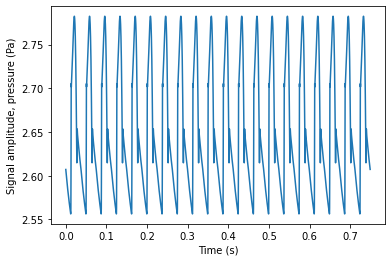

In [103]:
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude, pressure (Pa)')
plt.plot(data.time, data.pressure)

In [104]:
x = data.pressure

In [108]:
from scipy import fft 
y = fft(x)


array([ 3.83476209e+04+8.16013923e-14j,  1.09234510e-13-5.26483050e-14j,
       -1.48248650e-13+8.88356877e-14j, ...,
        2.11824649e-13-2.30341819e-13j, -1.04072174e-13-1.78655531e-13j,
        6.61642977e-14-2.29959921e-14j])